# Student grades prediction

Project Description

The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades

Columns Description-  total 43 columns

Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

 


In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import joblib
import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv("Grades.csv")
df   

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


As we see in the above dataset there is total 571 rows and 43 columns

In [3]:
#looking first 5 rows of the dataset
df.head()        

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [4]:
#looking for last 5 rows of dataset
df.tail()      

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193
570,CS-97571,C,D,D,C,C,D+,B,C+,C,...,C+,C,B-,D,F,C-,B+,D,C-,1.753


In [5]:
df.sample(10)   

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
15,CS-97016,A-,C-,B-,D,B-,B+,B-,A-,B,...,B,C,B-,C+,A-,A-,C+,C-,A-,2.777
60,CS-97061,C,B+,WU,D+,C-,B-,F,D,A-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.418
546,CS-97547,B,D,A,B+,B+,A-,B-,D,B,...,B+,B+,A,B+,B+,B,B+,C+,B,3.019
283,CS-97284,D+,D,C-,D,C-,C,B+,D+,C-,...,D+,C-,C-,D+,B+,B+,D+,NaN,D+,2.086
205,CS-97206,A,C,A-,A,C+,A-,C,C-,B,...,D,D+,C,C-,A-,A-,C-,D,C+,2.347
303,CS-97304,D,C-,D+,B,A,B-,B,B+,C+,...,A,B-,D+,B+,B,A,B-,B+,NaN,2.736
314,CS-97315,D+,C,C,C,C+,D+,B+,D+,D,...,A+,B+,A-,B,B-,A-,B,A-,NaN,2.729
372,CS-97373,A-,B,A-,A,A,A-,A-,A+,B+,...,A+,A-,B,B,NaN,A,A-,A,A,3.707
97,CS-97098,A,B-,A,A-,B-,A-,B-,A-,A-,...,C,B+,C+,C+,A-,A,A-,A-,A-,3.258
275,CS-97276,B-,B+,B,D+,C-,B+,C-,D,D+,...,C-,D+,C-,D+,B+,B+,D,D+,B,1.905


In [6]:
df.shape      

(571, 43)

In [7]:
df.columns 

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [8]:
df.dtypes     

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

In the dataset all the input variables are object type and output or label is float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In the dataset there is total 43 columns and 571 rows

dtype of all the column is object except output column which has float64 dtype

Memory usage of the above dataset is total 191.9+kb

In [11]:
df.isnull().sum()          

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [12]:
df.drop(['Seat No.'], axis=1,inplace=True)

In [13]:
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,A+,A,A,A,A,A,A,A-,A,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,B,A,A-,B+,A,A,A,A,A,B,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [14]:
#Filling the missing values using mode method.
df['CY-105'] = df['CY-105'].fillna(df['CY-105'].mode()[0])
df['HS-105/12'] = df['HS-105/12'].fillna(df['HS-105/12'].mode()[0])
df['MT-111'] = df['MT-111'].fillna(df['MT-111'].mode()[0])
df['CS-106'] = df['CS-106'].fillna(df['CS-106'].mode()[0])
df['EL-102']=df['EL-102'].fillna(df['EL-102'].mode()[0])
df['EE-119'] = df['EE-119'].fillna(df['EE-119'].mode()[0])
df['ME-107'] = df['ME-107'].fillna(df['ME-107'].mode()[0])
df['CS-107'] = df['CS-107'].fillna(df['CS-107'].mode()[0])
df['HS-205/20'] = df['HS-205/20'].fillna(df['HS-205/20'].mode()[0])
df['MT-222']=df['MT-222'].fillna(df['MT-222'].mode()[0])
df['EE-222'] = df['EE-222'].fillna(df['EE-222'].mode()[0])
df['MT-224'] = df['MT-224'].fillna(df['MT-224'].mode()[0])
df['CS-210'] = df['CS-210'].fillna(df['CS-210'].mode()[0])
df['CS-211'] = df['CS-211'].fillna(df['CS-211'].mode()[0])
df['CS-203']=df['CS-203'].fillna(df['CS-203'].mode()[0])
df['CS-214'] = df['CS-214'].fillna(df['CS-214'].mode()[0])
df['EE-217'] = df['EE-217'].fillna(df['EE-217'].mode()[0])
df['CS-212'] = df['CS-212'].fillna(df['CS-212'].mode()[0])
df['CS-215'] = df['CS-215'].fillna(df['CS-215'].mode()[0])
df['MT-331']=df['MT-331'].fillna(df['MT-331'].mode()[0])
df['EF-303'] = df['EF-303'].fillna(df['EF-303'].mode()[0])
df['HS-304'] = df['HS-304'].fillna(df['HS-304'].mode()[0])
df['CS-301'] = df['CS-301'].fillna(df['CS-301'].mode()[0])
df['CS-302'] = df['CS-302'].fillna(df['CS-302'].mode()[0])
df['TC-383']=df['TC-383'].fillna(df['TC-383'].mode()[0])
df['MT-442'] = df['MT-442'].fillna(df['MT-442'].mode()[0])
df['EL-332'] = df['EL-332'].fillna(df['EL-332'].mode()[0])
df['CS-318'] = df['CS-318'].fillna(df['CS-318'].mode()[0])
df['CS-306'] = df['CS-306'].fillna(df['CS-306'].mode()[0])
df['CS-312']=df['CS-312'].fillna(df['CS-312'].mode()[0])
df['CS-317'] = df['CS-317'].fillna(df['CS-317'].mode()[0])
df['CS-403'] = df['CS-403'].fillna(df['CS-403'].mode()[0])
df['CS-421'] = df['CS-421'].fillna(df['CS-421'].mode()[0])
df['CS-406'] = df['CS-406'].fillna(df['CS-406'].mode()[0])
df['CS-414']=df['CS-414'].fillna(df['CS-414'].mode()[0])
df['CS-419'] = df['CS-419'].fillna(df['CS-419'].mode()[0])
df['CS-423'] = df['CS-423'].fillna(df['CS-423'].mode()[0])
df['CS-412'] = df['CS-412'].fillna(df['CS-412'].mode()[0])

In [15]:
df.isnull().sum()

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

Now no null values are present in the dataset.

In [16]:
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,A+,A,A,A,A,A,A,A-,A,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,B,A,A-,B+,A,A,A,A,A,B,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [17]:
df['CGPA'].value_counts()

3.019    5
3.058    3
2.793    3
3.443    3
2.206    3
        ..
2.555    1
2.042    1
2.634    1
2.053    1
1.753    1
Name: CGPA, Length: 491, dtype: int64

In [18]:
for i in df.columns:
        print(df[i].value_counts())
        print('\n\n')
        print ('*'*100)

A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64



****************************************************************************************************
A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64



****************************************************************************************************
A     178
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64



****************************************************************************************************
A     97
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: HS-105/12, dtype: int64



*****************************************************************************************

In [19]:
df.nunique().to_frame("Number of Unique Values")  

,Number of Unique Values
PH-121,13
HS-101,12
CY-105,13
HS-105/12,13
MT-111,13
CS-105,11
CS-106,13
EL-102,13
EE-119,12
ME-107,13


In [20]:
df.columns

Index(['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412', 'CGPA'],
      dtype='object')

In [21]:
def generate_pie(i):
    plt.figure(figsize=(10,5))
    plt.pie(i.value_counts(), labels=i.value_counts().index, autopct='%1.2f%%',shadow=True,)
    plt.legend(prop={'size':14})
    plt.axis('equal')
    plt.tight_layout()
    return plt.show()

In [22]:
cols=['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412']

Pie Chart For The Column PH-121


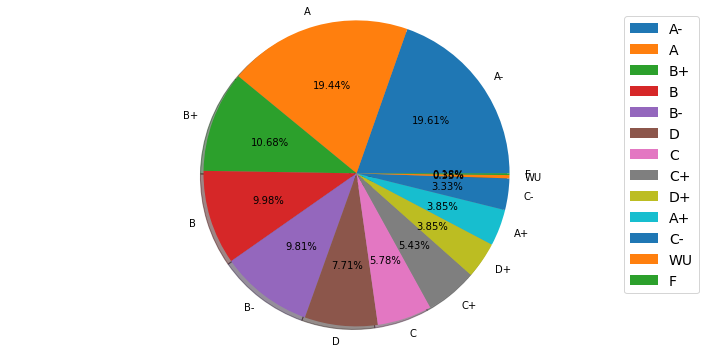

Pie Chart For The Column HS-101


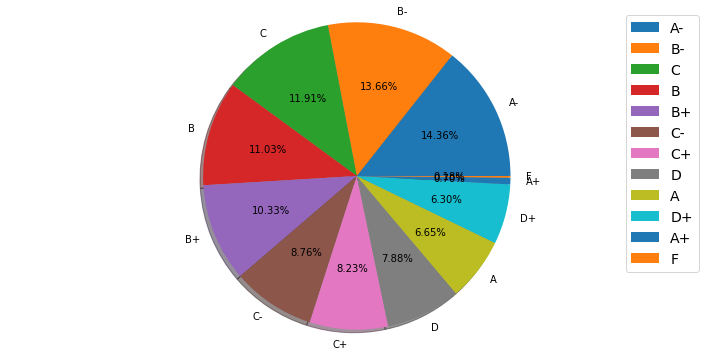

Pie Chart For The Column CY-105


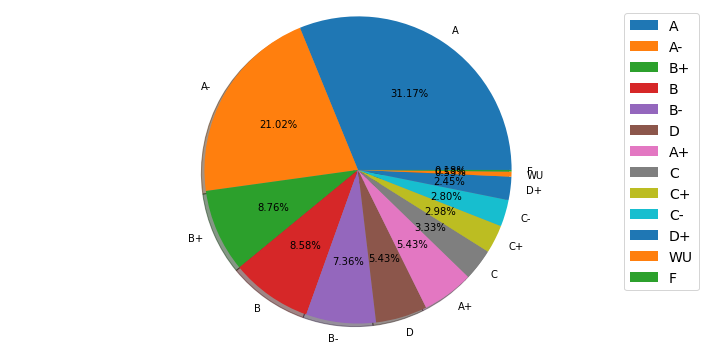

Pie Chart For The Column HS-105/12


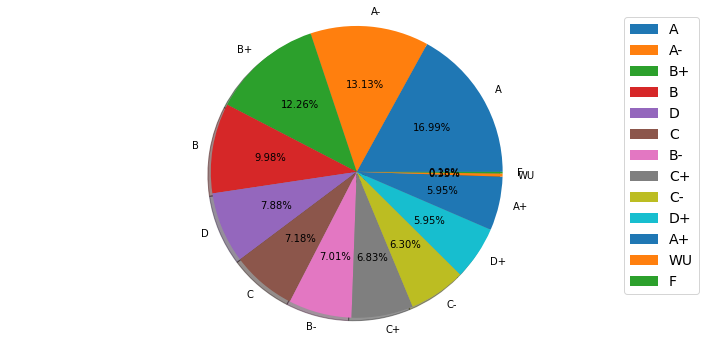

Pie Chart For The Column MT-111


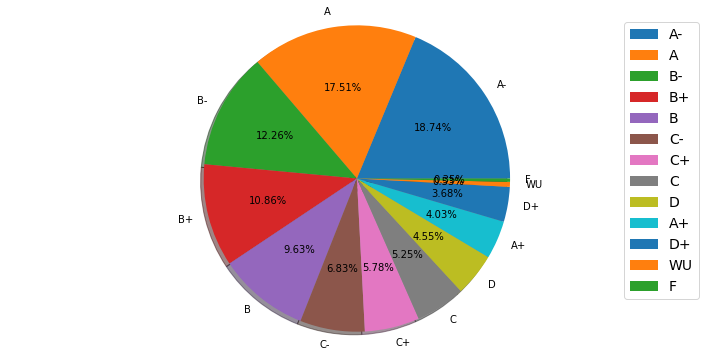

Pie Chart For The Column CS-105


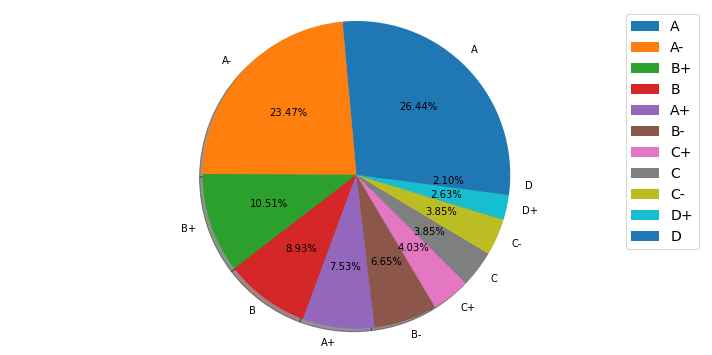

Pie Chart For The Column CS-106


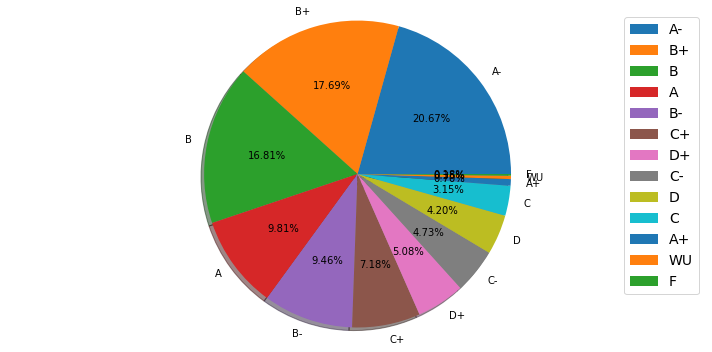

Pie Chart For The Column EL-102


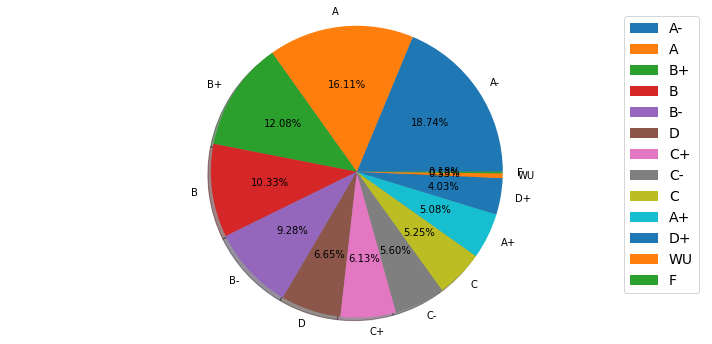

Pie Chart For The Column EE-119


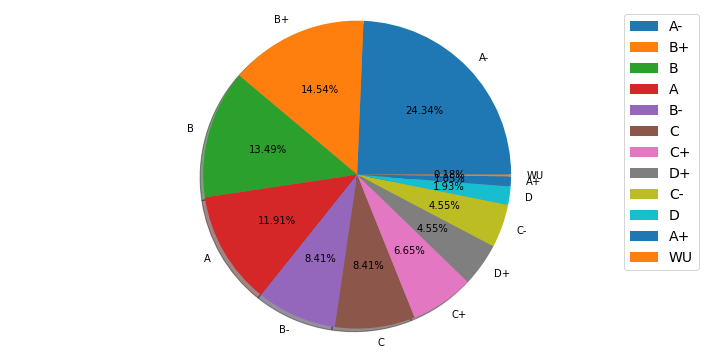

Pie Chart For The Column ME-107


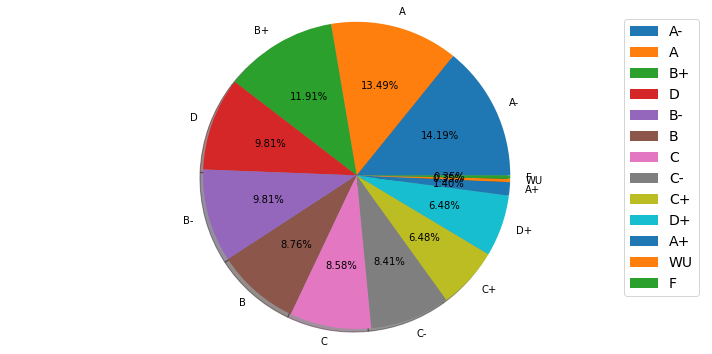

Pie Chart For The Column CS-107


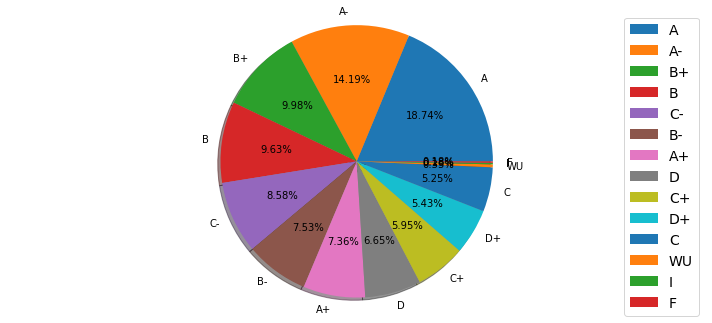

Pie Chart For The Column HS-205/20


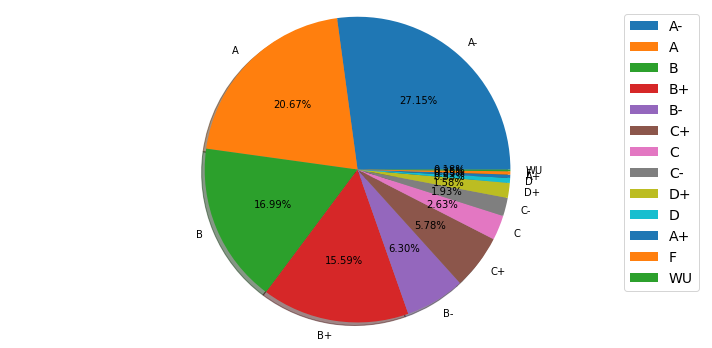

Pie Chart For The Column MT-222


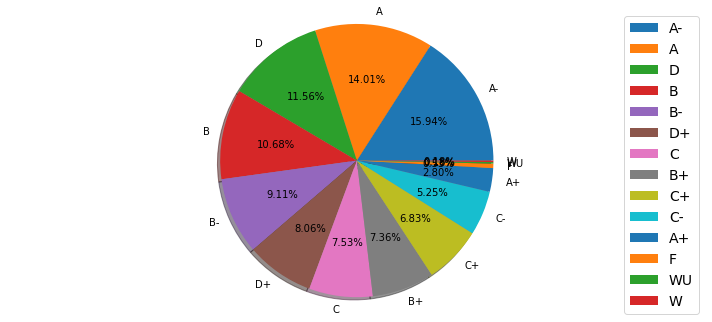

Pie Chart For The Column EE-222


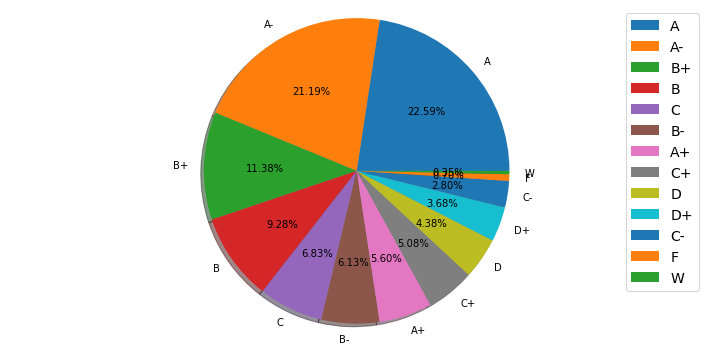

Pie Chart For The Column MT-224


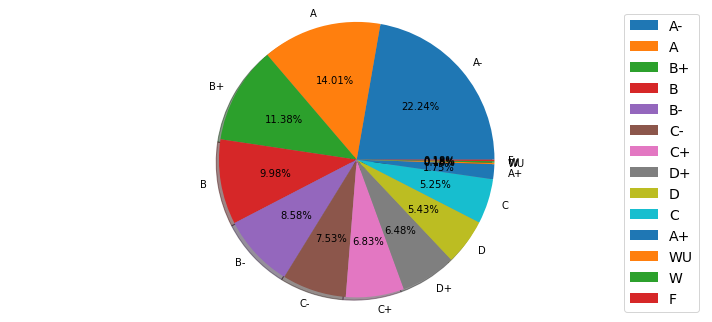

Pie Chart For The Column CS-210


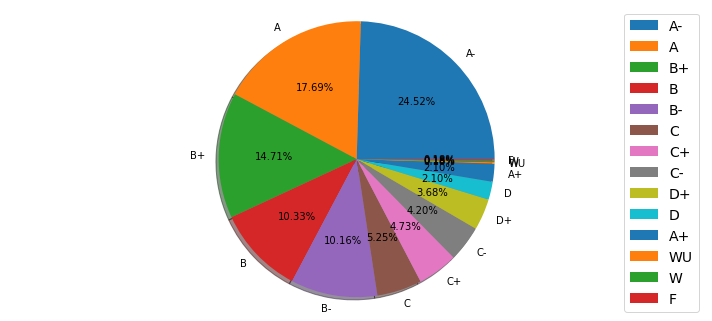

Pie Chart For The Column CS-211


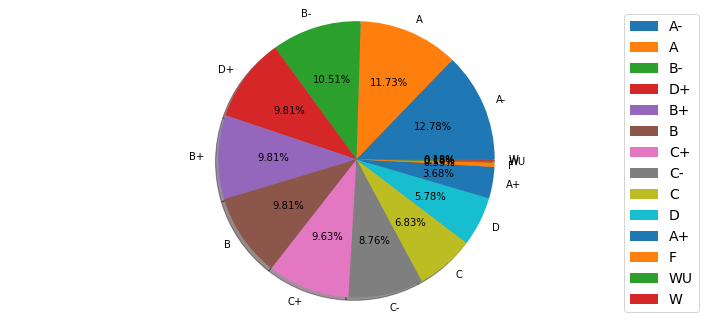

Pie Chart For The Column CS-203


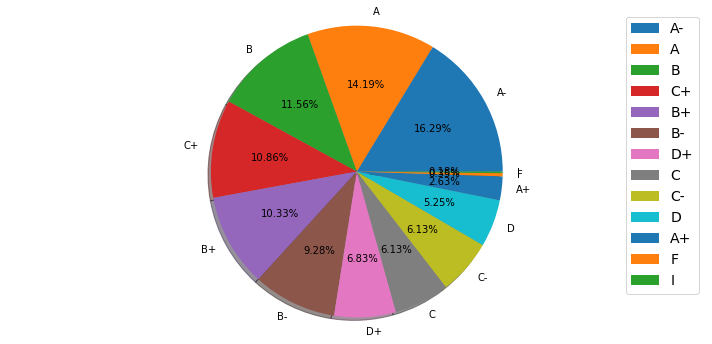

Pie Chart For The Column CS-214


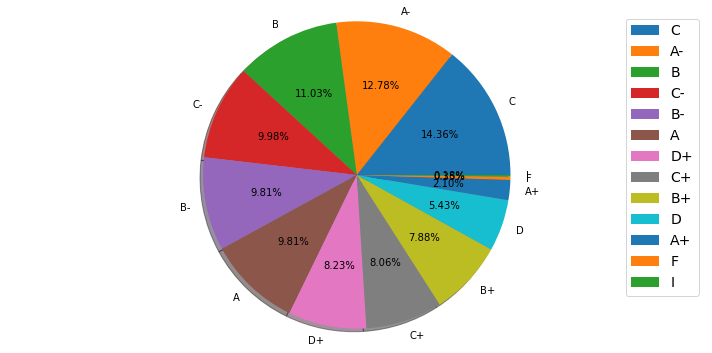

Pie Chart For The Column EE-217


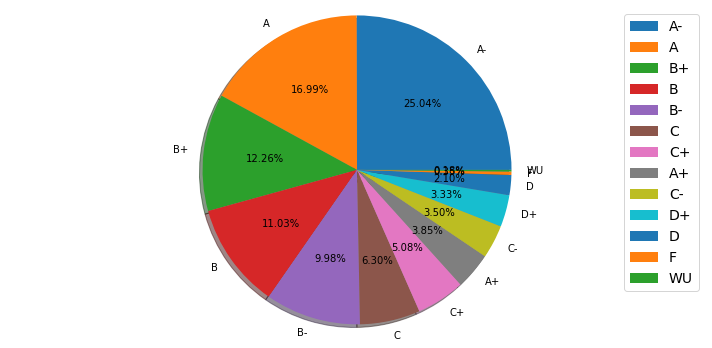

Pie Chart For The Column CS-212


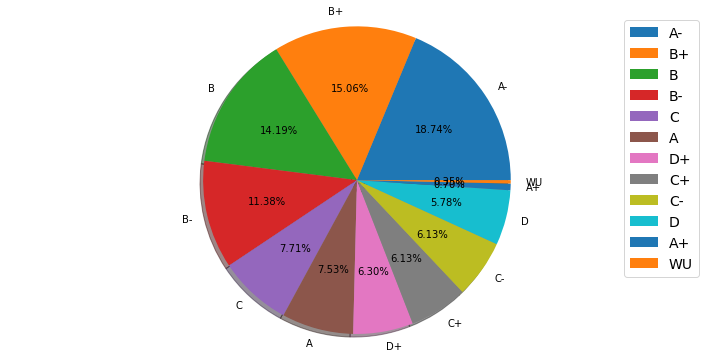

Pie Chart For The Column CS-215


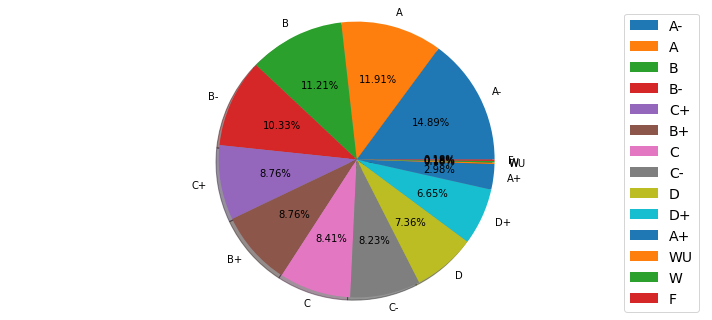

Pie Chart For The Column MT-331


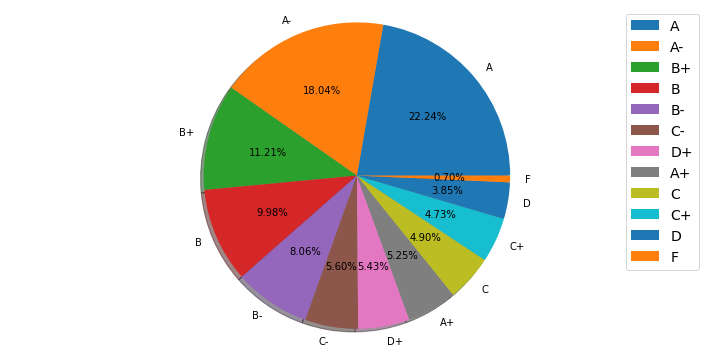

Pie Chart For The Column EF-303


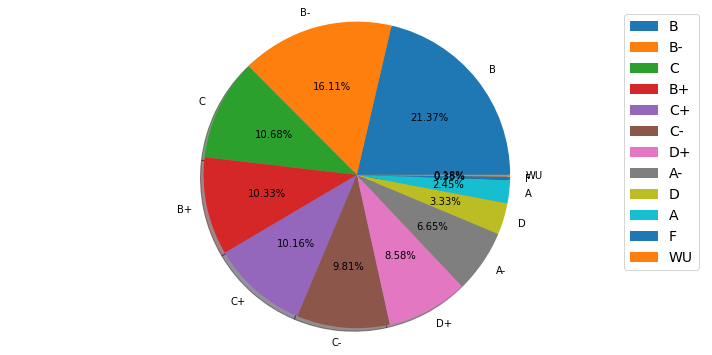

Pie Chart For The Column HS-304


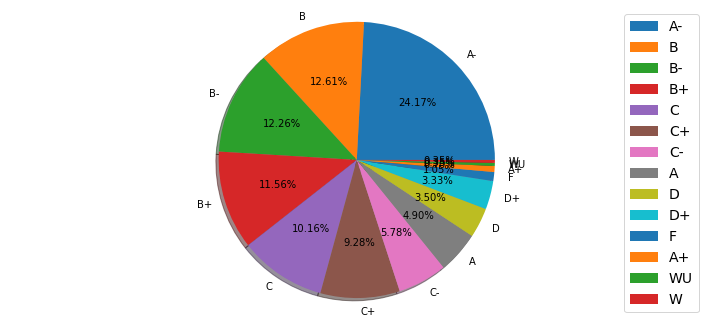

Pie Chart For The Column CS-301


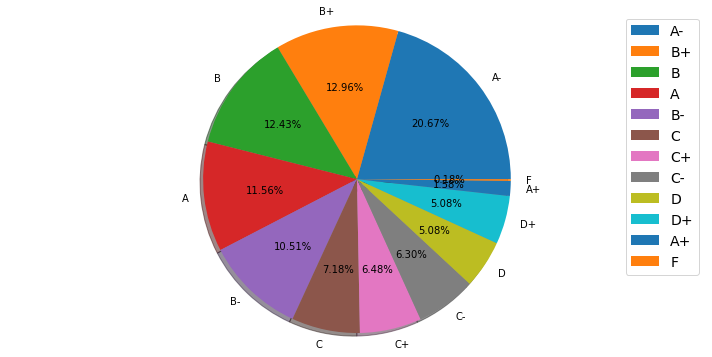

Pie Chart For The Column CS-302


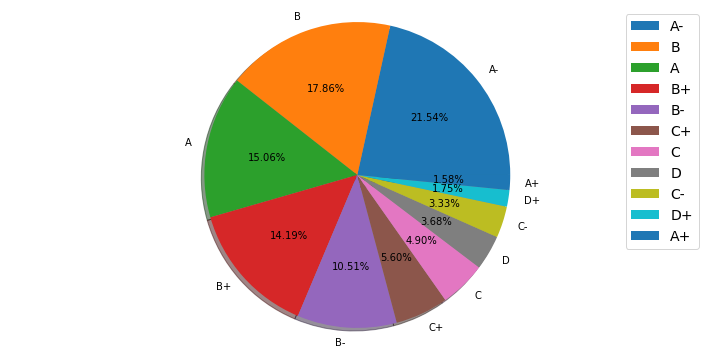

Pie Chart For The Column TC-383


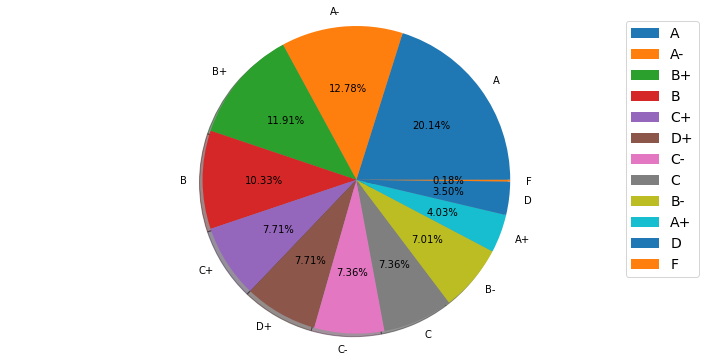

Pie Chart For The Column MT-442


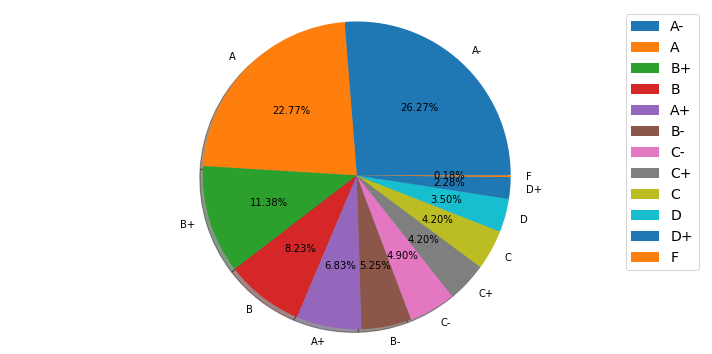

Pie Chart For The Column EL-332


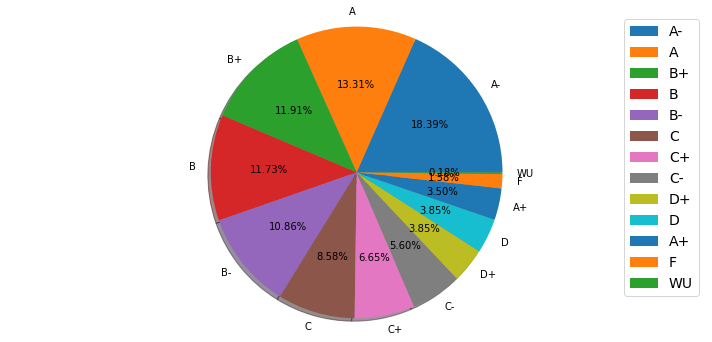

Pie Chart For The Column CS-318


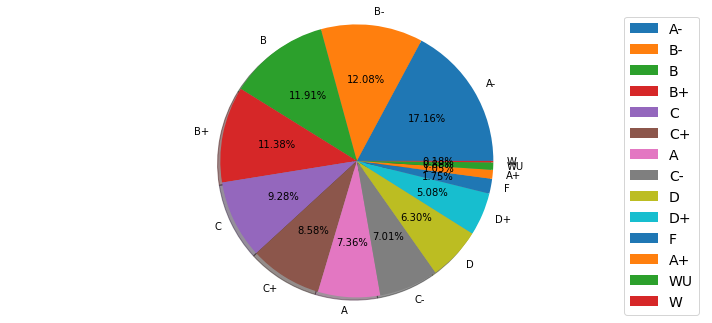

Pie Chart For The Column CS-306


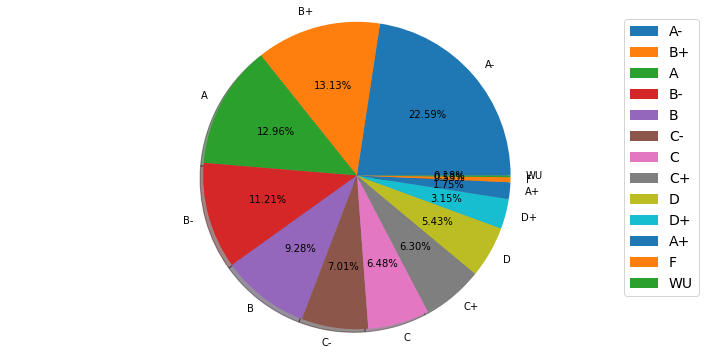

Pie Chart For The Column CS-312


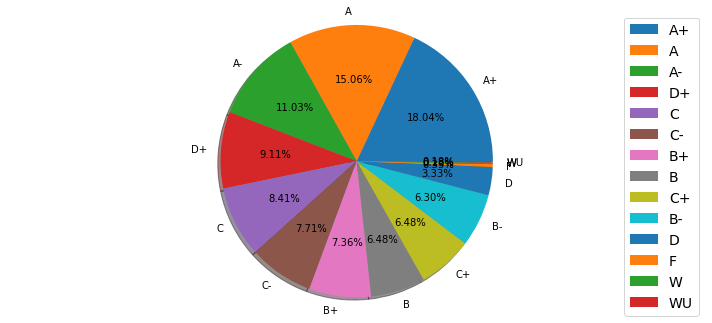

Pie Chart For The Column CS-317


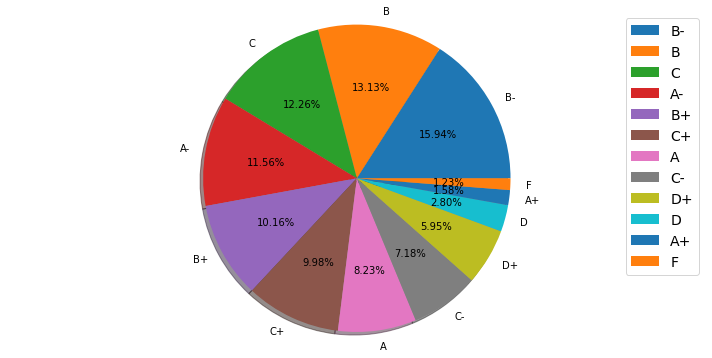

Pie Chart For The Column CS-403


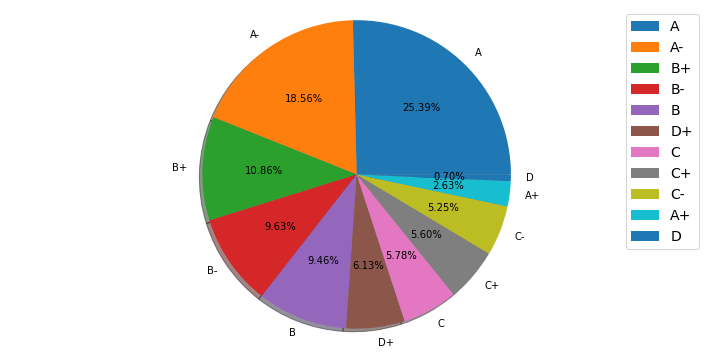

Pie Chart For The Column CS-421


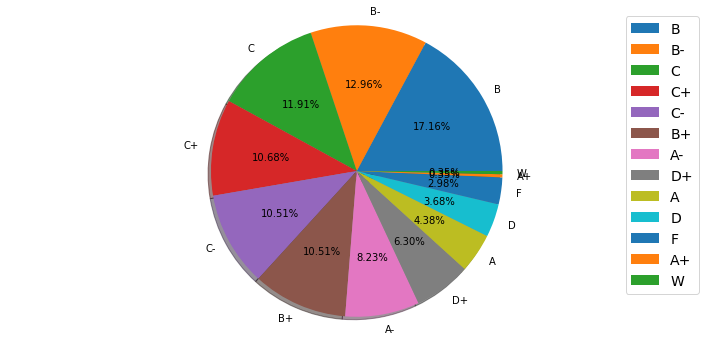

Pie Chart For The Column CS-406


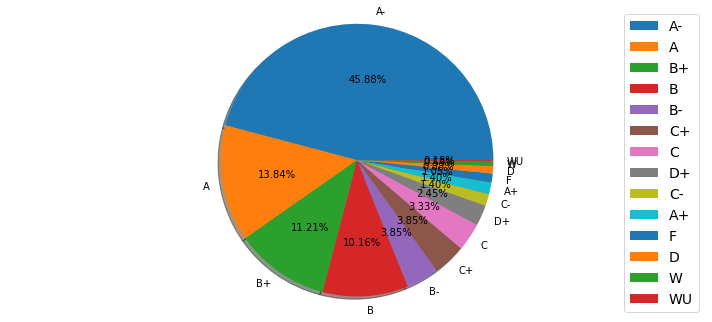

Pie Chart For The Column CS-414


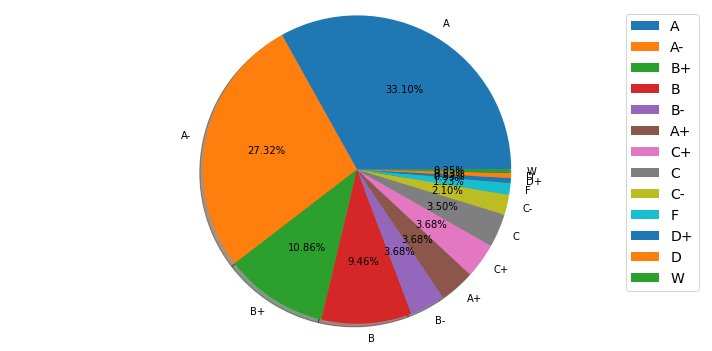

Pie Chart For The Column CS-419


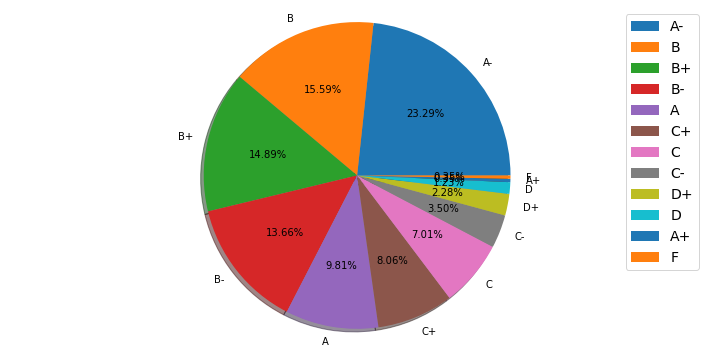

Pie Chart For The Column CS-423


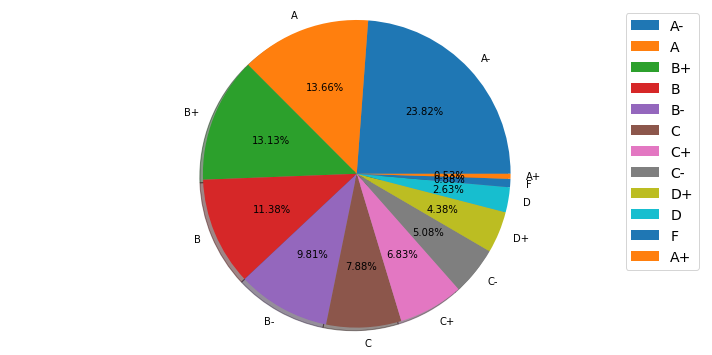

Pie Chart For The Column CS-412


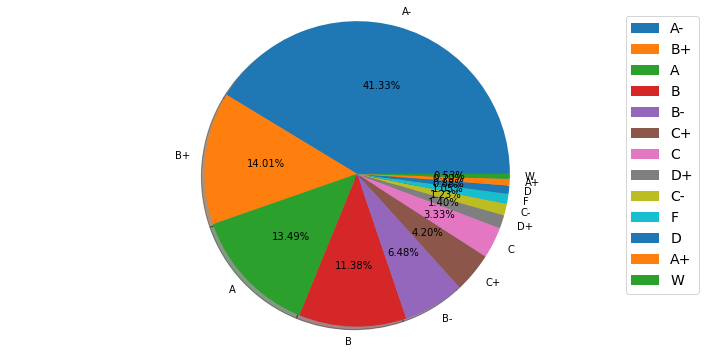

In [23]:
for x in df[cols]:
    print("Pie Chart For The Column",x)
    generate_pie(df[x])

<AxesSubplot:xlabel='CGPA', ylabel='Density'>

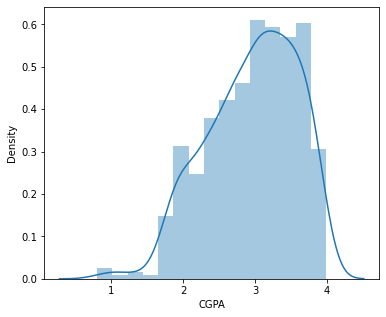

In [24]:
plt.figure(figsize=(6,5))
sns.distplot(df['CGPA'])

In [25]:
encode=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=encode.fit_transform(df[i].values.reshape(-1,1))
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,5.0,8.0,...,8.0,8.0,8.0,8.0,2.0,0.0,8.0,3.0,2.0,2.205
1,0.0,9.0,10.0,9.0,5.0,6.0,9.0,0.0,10.0,9.0,...,10.0,9.0,6.0,9.0,2.0,5.0,6.0,6.0,3.0,2.008
2,0.0,3.0,0.0,5.0,4.0,0.0,5.0,4.0,2.0,2.0,...,3.0,3.0,0.0,6.0,0.0,0.0,0.0,2.0,0.0,3.608
3,9.0,7.0,10.0,9.0,9.0,2.0,10.0,8.0,9.0,7.0,...,10.0,6.0,10.0,8.0,5.0,3.0,7.0,7.0,7.0,1.906
4,2.0,2.0,2.0,4.0,0.0,0.0,2.0,4.0,0.0,2.0,...,5.0,4.0,4.0,5.0,2.0,0.0,2.0,2.0,0.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,4.0,...,2.0,2.0,0.0,0.0,0.0,4.0,4.0,3.0,0.0,3.798
567,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,4.0,4.0,0.0,0.0,2.0,3.0,2.0,6.0,2.0,3.772
568,3.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,...,2.0,3.0,0.0,4.0,0.0,6.0,4.0,2.0,2.0,3.470
569,0.0,4.0,9.0,0.0,9.0,10.0,5.0,8.0,5.0,8.0,...,9.0,3.0,3.0,8.0,9.0,6.0,3.0,5.0,6.0,2.193


In [26]:
df.describe()    

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,3.781086,5.071804,2.898424,4.241681,3.896673,2.838879,4.122592,3.959720,3.886165,4.779335,...,4.071804,4.835377,3.432574,5.385289,2.984238,2.397548,3.856392,3.966725,3.049037,2.954888
std,3.046895,2.785317,2.964737,3.200507,2.988546,2.696709,2.727192,3.031436,2.657528,3.146202,...,3.362345,2.740382,2.980685,2.729063,2.468346,2.499388,2.382769,2.795475,2.332316,0.620552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,2.000000,3.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,3.000000,0.000000,3.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.538000
50%,3.000000,5.000000,2.000000,4.000000,4.000000,2.000000,4.000000,3.000000,3.000000,5.000000,...,3.000000,5.000000,3.000000,5.000000,2.000000,2.000000,4.000000,4.000000,2.000000,3.029000
75%,6.000000,7.000000,4.500000,7.000000,6.000000,4.000000,5.000000,6.000000,6.000000,8.000000,...,7.000000,7.000000,5.000000,7.000000,4.000000,4.000000,5.000000,6.000000,4.000000,3.451000
max,12.000000,11.000000,12.000000,12.000000,12.000000,10.000000,12.000000,12.000000,11.000000,12.000000,...,13.000000,11.000000,10.000000,12.000000,13.000000,12.000000,11.000000,11.000000,12.000000,3.985000


In [27]:
df.corr()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
PH-121,1.000000,0.382436,0.557843,0.498561,0.468968,0.609990,0.293963,0.423942,0.579964,0.533558,...,0.038184,0.464022,0.321264,0.290351,0.280166,0.152437,0.462770,0.094921,0.293815,-0.663135
HS-101,0.382436,1.000000,0.335074,0.473132,0.432742,0.400713,0.312019,0.349412,0.309697,0.336545,...,0.213380,0.364250,0.229546,0.301934,0.265551,0.225977,0.284668,0.228103,0.226039,-0.537170
CY-105,0.557843,0.335074,1.000000,0.510123,0.538380,0.578573,0.378223,0.447539,0.467250,0.464418,...,0.261555,0.472137,0.464575,0.349827,0.129957,0.008774,0.430053,0.120885,0.064912,-0.658282
HS-105/12,0.498561,0.473132,0.510123,1.000000,0.494731,0.482406,0.499093,0.360304,0.400303,0.320137,...,0.263143,0.478816,0.451907,0.415946,0.168150,0.142806,0.465352,0.235029,0.153293,-0.613989
MT-111,0.468968,0.432742,0.538380,0.494731,1.000000,0.393684,0.500729,0.555895,0.409161,0.471685,...,0.467946,0.555098,0.410540,0.511463,0.300391,0.228637,0.502473,0.400679,0.269792,-0.730095
CS-105,0.609990,0.400713,0.578573,0.482406,0.393684,1.000000,0.286324,0.353949,0.507357,0.455470,...,0.059711,0.387639,0.279329,0.236345,0.237615,0.121965,0.306827,0.045134,0.179777,-0.613169
CS-106,0.293963,0.312019,0.378223,0.499093,0.500729,0.286324,1.000000,0.338645,0.269895,0.281233,...,0.450752,0.416562,0.426402,0.397195,0.129554,0.108916,0.421989,0.339963,0.185782,-0.534995
EL-102,0.423942,0.349412,0.447539,0.360304,0.555895,0.353949,0.338645,1.000000,0.448908,0.461690,...,0.301324,0.466556,0.304240,0.368959,0.253133,0.242234,0.379308,0.369173,0.265289,-0.642262
EE-119,0.579964,0.309697,0.467250,0.400303,0.409161,0.507357,0.269895,0.448908,1.000000,0.572964,...,0.156809,0.445496,0.341988,0.359230,0.297664,0.214165,0.465913,0.244615,0.320746,-0.646829
ME-107,0.533558,0.336545,0.464418,0.320137,0.471685,0.455470,0.281233,0.461690,0.572964,1.000000,...,0.199848,0.462568,0.336647,0.345832,0.300913,0.154184,0.440407,0.220977,0.293638,-0.663023


<AxesSubplot:>

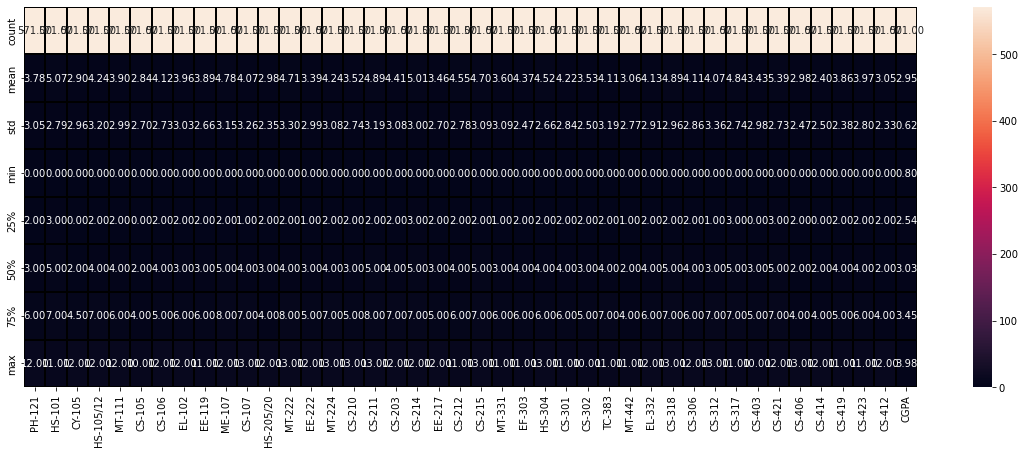

In [28]:
plt.figure(figsize=(20,7))
sns.heatmap(df.describe(),annot=True,linewidth=0.1,linecolor='black',fmt='0.2f')

In [29]:
df.corr()['CGPA'].sort_values()

CS-210      -0.761468
CS-317      -0.760792
CS-214      -0.733848
CS-215      -0.730460
MT-111      -0.730095
EL-332      -0.729609
CS-306      -0.708299
CS-302      -0.696112
MT-224      -0.692696
CS-301      -0.664117
PH-121      -0.663135
ME-107      -0.663023
CY-105      -0.658282
MT-222      -0.656320
EE-217      -0.655993
EE-119      -0.646829
CS-203      -0.644191
CS-212      -0.642878
EL-102      -0.642262
CS-419      -0.641804
CS-421      -0.633001
CS-211      -0.628070
CS-107      -0.615309
HS-105/12   -0.613989
CS-105      -0.613169
MT-442      -0.582592
EE-222      -0.575335
TC-383      -0.572329
CS-318      -0.566393
HS-304      -0.557912
CS-403      -0.544543
HS-101      -0.537170
CS-106      -0.534995
CS-423      -0.520968
MT-331      -0.508428
EF-303      -0.485478
CS-406      -0.474419
CS-412      -0.466512
HS-205/20   -0.460525
CS-312      -0.458019
CS-414      -0.384003
CGPA         1.000000
Name: CGPA, dtype: float64

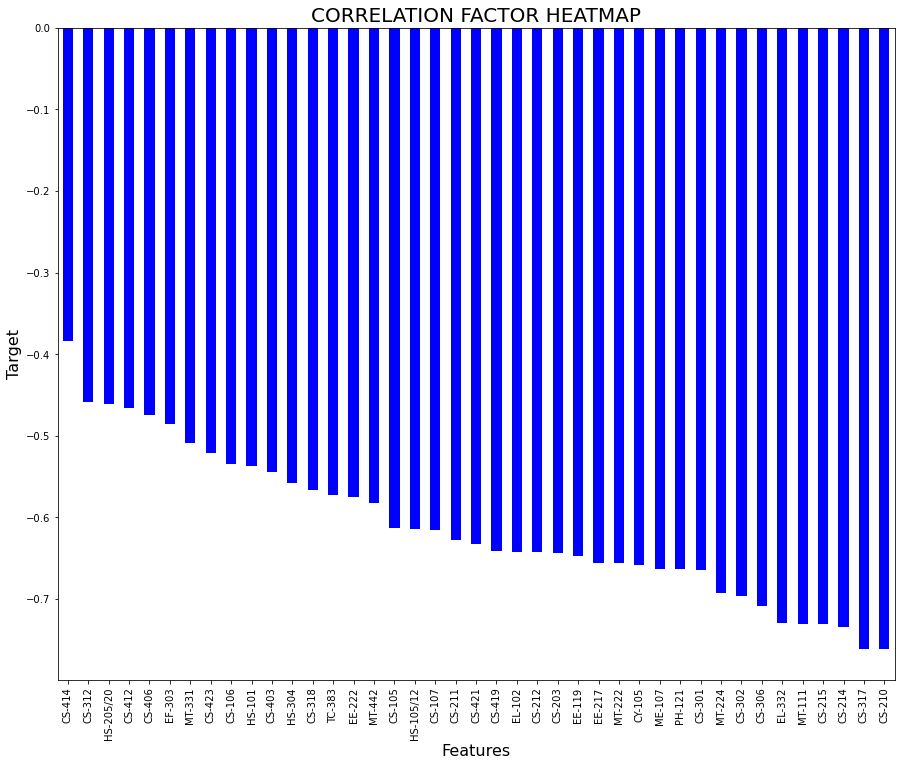

In [30]:
plt.figure(figsize=(15,12))                 
df.corr()['CGPA'].sort_values(ascending=False).drop(['CGPA']).plot(kind='bar',color='blue')
plt.xlabel('Features',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.title('CORRELATION FACTOR HEATMAP',fontsize=20)
plt.show()

In [31]:
##Splittig the dataset into Independent and Dependent variables
df.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,5.0,8.0,...,8.0,8.0,8.0,8.0,2.0,0.0,8.0,3.0,2.0,2.205
1,0.0,9.0,10.0,9.0,5.0,6.0,9.0,0.0,10.0,9.0,...,10.0,9.0,6.0,9.0,2.0,5.0,6.0,6.0,3.0,2.008
2,0.0,3.0,0.0,5.0,4.0,0.0,5.0,4.0,2.0,2.0,...,3.0,3.0,0.0,6.0,0.0,0.0,0.0,2.0,0.0,3.608
3,9.0,7.0,10.0,9.0,9.0,2.0,10.0,8.0,9.0,7.0,...,10.0,6.0,10.0,8.0,5.0,3.0,7.0,7.0,7.0,1.906
4,2.0,2.0,2.0,4.0,0.0,0.0,2.0,4.0,0.0,2.0,...,5.0,4.0,4.0,5.0,2.0,0.0,2.0,2.0,0.0,3.448


In [32]:
x=df.loc[:,df.columns!='CGPA']
y=df.loc[:,'CGPA']

In [33]:
print("Shape of x is", x.shape, "and Shape of y is",y.shape)

Shape of x is (571, 41) and Shape of y is (571,)


# Scaling the Data

In [34]:
SC=StandardScaler()
x=pd.DataFrame(SC.fit_transform(x),columns=x.columns)
x

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,0.400402,1.770900,1.722261,0.549869,1.374222,2.657832,1.790004,1.333963,0.419492,1.024565,...,0.663660,1.169315,1.155824,1.533685,0.958939,-0.399094,-0.960095,1.740513,-0.346121,-0.450178
1,-1.242052,1.411559,2.397448,1.488043,0.369509,1.173242,1.790004,-1.307365,2.302589,1.342687,...,1.715324,1.764660,1.521056,0.862110,1.325686,-0.399094,1.042149,0.900418,0.727983,-0.021043
2,-1.242052,-0.744483,-0.978490,0.237145,0.034605,-1.053643,0.322008,0.013299,-0.710366,-0.884168,...,-0.738559,-0.319046,-0.670339,-1.152616,0.225444,-1.210063,-0.960095,-1.619869,-0.704156,-1.308446
3,1.714365,0.692879,2.397448,1.488043,1.709126,-0.311348,2.157003,1.333963,1.925970,0.706443,...,1.364769,1.764660,0.425358,2.205260,0.958939,0.817361,0.241251,1.320466,1.086017,1.695494
4,-0.585070,-1.103823,-0.303302,-0.075580,-1.305012,-1.053643,-0.778989,0.013299,-1.463605,-0.884168,...,-0.738559,0.276298,-0.305107,0.190534,-0.141304,-0.399094,-0.960095,-0.779774,-0.704156,-1.308446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,-0.256579,-1.822504,-0.978490,-0.701029,-0.970108,-1.053643,-0.778989,-0.647033,-1.086986,-0.247924,...,-0.037450,-0.616719,-1.035572,-1.152616,-1.975041,-1.210063,0.641700,0.060322,-0.346121,-1.308446
567,-0.913561,-1.822504,-0.978490,-1.326478,-1.305012,-1.053643,-1.512987,-0.647033,-1.463605,-1.520412,...,-0.738559,-0.021374,-0.305107,-1.152616,-1.975041,-0.399094,0.241251,-0.779774,0.727983,-0.450178
568,-0.256579,-1.822504,-0.303302,-0.075580,-1.305012,-1.053643,-1.512987,-1.307365,-1.463605,-0.566046,...,-0.037450,-0.616719,-0.670339,-1.152616,-0.508051,-1.210063,1.442597,0.060322,-0.704156,-0.450178
569,-1.242052,-0.385142,2.059854,-1.326478,1.709126,2.657832,0.322008,1.333963,0.419492,1.024565,...,-0.037450,1.466987,-0.670339,-0.145253,0.958939,2.439300,1.442597,-0.359726,0.369948,1.266360


In [35]:
#Checking for multicollinearity using Variance Inflation Factor
def vif_cal():
    vif=pd.DataFrame()
    vif["vif factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [36]:
vif_cal()

    vif factor   features
0     2.827608     PH-121
1     1.771294     HS-101
2     2.514966     CY-105
3     2.293035  HS-105/12
4     2.638921     MT-111
5     2.366597     CS-105
6     1.927701     CS-106
7     1.968027     EL-102
8     2.190768     EE-119
9     2.294552     ME-107
10    2.350875     CS-107
11    1.633210  HS-205/20
12    2.277248     MT-222
13    2.254361     EE-222
14    2.798314     MT-224
15    3.084264     CS-210
16    2.640904     CS-211
17    2.612616     CS-203
18    2.688396     CS-214
19    2.435192     EE-217
20    2.770283     CS-212
21    3.022915     CS-215
22    2.052599     MT-331
23    2.113301     EF-303
24    2.498852     HS-304
25    3.095874     CS-301
26    2.741509     CS-302
27    2.889101     TC-383
28    2.027056     MT-442
29    3.275353     EL-332
30    2.355677     CS-318
31    3.471549     CS-306
32    3.239651     CS-312
33    3.161398     CS-317
34    2.504472     CS-403
35    2.813594     CS-421
36    2.166488     CS-406
37    2.2948

Here it is clear that multicollinearity is not present in the dataset.

In [37]:
#Principal Component Analysis
pca=PCA(n_components=20)
x=pca.fit_transform(x)
x

array([[ 5.50454859,  1.22175582,  3.14410232, ...,  0.49533637,
         1.17547677,  0.54164398],
       [ 6.5074061 ,  1.06029628,  0.4591093 , ..., -0.25021311,
        -0.36070075, -1.65469124],
       [-4.91400457,  1.52555068,  0.0781583 , ..., -0.13599754,
        -0.14201199, -0.8440819 ],
       ...,
       [-3.41024331, -1.40971856, -1.22190377, ...,  1.39713619,
        -0.12840303, -0.5754457 ],
       [ 4.66534213, -0.52217181, -1.15628722, ...,  2.28440725,
        -0.0435765 ,  2.19794498],
       [ 7.49900641, -1.87289168, -2.39375306, ..., -0.33747374,
        -0.14791062,  1.02828078]])

# MODEL TRAINING AND TESTING

In [44]:
lr=LinearRegression()

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)    
pred_test=lr.predict(x_test)
print(f"At random state {i}, the training accuracy ={r2_score(y_train,pred_train)}")
print(f"At random state {i}, the testing accuracy = {r2_score(y_test,pred_test)}")
print("\n\n")

At random state 99, the training accuracy =0.9375021897143768
At random state 99, the testing accuracy = 0.8738885401387049





In [46]:

 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)

In [47]:
lr.fit(x_train,y_train)   

LinearRegression()

In [48]:
pred_test=lr.predict(x_test)
print(r2_score(y_test,pred_test))

0.8738885401387049


In [49]:
#CROSS VALIDATION OF LINEAR REGRESSION MODEL
pred_lr=lr.predict(x_test)
ls=r2_score(y_test,pred_lr)

In [50]:
lscore=cross_val_score(lr,x,y,cv=i)
lsc=lscore.mean()
print ("At cv:-",i)
print ("Cross validation score is :-",lsc*100)
print ("Accuracy_score is :-",ls*100)
print ("\n")

At cv:- 99
Cross validation score is :- 88.83526153450995
Accuracy_score is :- 87.38885401387049




The accuracy score of Linear Regression Model is 87%.

In [51]:
mae=metrics.mean_absolute_error(y_test,pred_test)
mse=metrics.mean_squared_error(y_test,pred_test)
print("Mean Absolute Error=",mae)
print("Mean Squared Error=",mse)

Mean Absolute Error= 0.11188152885794776
Mean Squared Error= 0.053366609126655785


In [52]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('R2_SCORE is:-',r2_score(y_test, predrf))
print('Mean Absolute Error is:-',metrics.mean_absolute_error(y_test, predrf))
print("Mean Squared Error is:-",metrics.mean_squared_error(y_test,pred_test))
print('CV :-',cross_val_score(rf,x,y,cv=4).mean())

R2_SCORE is:- 0.8678165660901964
Mean Absolute Error is:- 0.08622600000000029
Mean Squared Error is:- 0.053366609126655785
CV :- 0.6758867489830557


The accuracy score of Random Forest Regressor is 86%

In [53]:
#DECISION TREE REGRESSOR
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print('R2_SCORE is:-',r2_score(y_test, preddt))
print('Mean Absolute Error is:-',metrics.mean_absolute_error(y_test, preddt))
print("Mean Squared Error is:-",metrics.mean_squared_error(y_test,pred_test))
print('CV  :-',cross_val_score(dt,x,y,cv=4).mean())

R2_SCORE is:- 0.8330940581680484
Mean Absolute Error is:- 0.10297391304347826
Mean Squared Error is:- 0.053366609126655785
CV  :- -0.10571261156348905


The accuracy score of Decision Tree Regressor is 83%

In [54]:
#GRADIENT BOOSTING REGRESSOR
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print('R2_SCORE is:-',r2_score(y_test, predgb))
print('Mean Absolute Error is:-',metrics.mean_absolute_error(y_test, predgb))
print("Mean Squared Error is:-",metrics.mean_squared_error(y_test,pred_test))
print('CV  :-',cross_val_score(gb,x,y,cv=4).mean())

R2_SCORE is:- 0.8833322906248522
Mean Absolute Error is:- 0.08383187830966758
Mean Squared Error is:- 0.053366609126655785
CV  :- 0.6036854923637522


The accuracy score of Gradient Boosting Regressor is 88%.

In [55]:
#KNEIGHBORS REGRESSOR
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print('R2_SCORE is:-',r2_score(y_test, predknn))
print('Mean Absolute Error is:-',metrics.mean_absolute_error(y_test, predknn))
print("Mean Squared Error is:-",metrics.mean_squared_error(y_test,pred_test))
print('CV  :-',cross_val_score(knn,x,y,cv=4).mean())

R2_SCORE is:- 0.853437963118926
Mean Absolute Error is:- 0.10388695652173913
Mean Squared Error is:- 0.053366609126655785
CV  :- 0.8818358082347832


The accuracy score of KNeighbors Regressor is 85%

In [56]:
data=pd.DataFrame([["linear regression","87%"],["decision tree regressor","83%"],["Kneighbors Regressor","85%"],["Gradient Boosting Regressor","88%"]],
              columns=["Model Name","Accuracy Score"])
data

,Model Name,Accuracy Score
0,linear regression,87%
1,decision tree regressor,83%
2,Kneighbors Regressor,85%
3,Gradient Boosting Regressor,88%


GRADIENT BOOSTING REGRESSOR BEST WITH ACCURACY OF 88%.

In [57]:
gb.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [58]:
parameters={'n_estimators' : [10, 50, 100],
              'max_depth' : [10, 20, 30],
              'learning_rate': [0.01,0.1,1,10,100]}

In [59]:
B=GridSearchCV(GradientBoostingRegressor(),parameters,cv=4)
B.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [10, 20, 30],
                         'n_estimators': [10, 50, 100]})

In [60]:
B.best_params_

{'learning_rate': 1, 'max_depth': 30, 'n_estimators': 50}

In [61]:
gb=GradientBoostingRegressor(learning_rate=1,max_depth=20, n_estimators=50)
gb.fit(x_train,y_train)
pred=gb.predict(x_test)
print('Accuracy =',r2_score(y_test,pred)*100)

Accuracy = 82.60844617539102


In [62]:
joblib.dump(gb,"Student Grades.pkl")     

['Student Grades.pkl']

In [63]:
#loading the saved model
C=joblib.load("Student Grades.pkl")

In [64]:
prediction=C.predict(x_test)
prediction

array([2.388, 3.763, 3.82 , 2.782, 2.698, 2.129, 2.776, 2.552, 2.88 ,
       2.918, 2.895, 3.513, 1.764, 3.075, 2.87 , 2.347, 3.182, 2.388,
       3.82 , 3.023, 3.765, 3.641, 2.947, 2.574, 3.182, 3.023, 2.687,
       3.504, 3.369, 3.473, 3.043, 3.573, 2.891, 3.882, 3.269, 1.658,
       3.208, 3.7  , 2.552, 1.753, 3.334, 3.737, 3.44 , 2.388, 3.856,
       1.89 , 3.387, 3.856, 2.687, 3.174, 3.365, 2.895, 2.266, 3.182,
       2.821, 3.578, 2.053, 3.645, 2.294, 2.391, 2.791, 3.136, 3.443,
       3.625, 3.725, 3.29 , 2.488, 3.761, 3.334, 3.339, 2.895, 3.189,
       3.272, 1.951, 2.619, 2.188, 2.763, 3.694, 3.473, 3.873, 2.442,
       3.182, 1.658, 3.058, 3.182, 3.477, 1.886, 2.266, 2.574, 2.086,
       2.086, 2.57 , 2.552, 2.982, 2.895, 3.437, 2.75 , 2.729, 3.908,
       2.484, 3.387, 3.01 , 1.658, 1.658, 2.408, 3.705, 3.615, 2.294,
       2.028, 2.548, 3.425, 3.831, 3.621, 3.168, 3.019])

In [65]:
pd.DataFrame([C.predict(x_test)[:],y_test[:]],index=["predcited grade","original grade"])

,0,1,2,3,4,5,6,7,8,9,...,105,106,107,108,109,110,111,112,113,114
predcited grade,2.388,3.763,3.820,2.782,2.698,2.129,2.776,2.552,2.880,2.918,...,3.705,3.615,2.294,2.028,2.548,3.425,3.831,3.621,3.168,3.019
original grade,2.193,3.798,3.806,2.845,2.648,2.188,2.681,2.608,2.931,2.805,...,3.721,3.653,2.254,2.146,2.576,1.493,3.816,3.656,3.335,3.029
